## Đổi tên file ảnh

In [3]:
import os

folder_path = "./Flower/"
subfolders = [f.name for f in os.scandir(folder_path) if f.is_dir()]


for subfolder in subfolders:
    path = os.path.join(folder_path, subfolder)
    files = os.listdir(path)
    files.sort()
    new_prefix =  subfolder
    
    for i, file_name in enumerate(files):
        new_name = new_prefix + str(i+1).zfill(2) + ".png"
        os.rename(os.path.join(path, file_name), os.path.join(path, new_name))

In [13]:
%reset

## Tách đặc trưng lưu vào file

In [3]:
from Feature import Feature
from PIL import Image
import numpy as np
import json

import os
folder_path = './Flower/'
subfolders = [f.name for f in os.scandir(folder_path) if f.is_dir()]

feature_data = []
feature = Feature()
for subfolder in subfolders:
    # Lấy danh sách các tệp trong thư mục
    files = os.listdir(os.path.join(folder_path, subfolder))
    
    for file_name in files:
        data = {}
        data['label'] = subfolder
        # Đọc ảnh
        img = Image.open(os.path.join(folder_path, subfolder, file_name))
        img = np.array(img)
        # Tính toán đặc trưng
        color_feature = feature.color_histogram(img)
        hog_feature = feature.hog(img)
        data['color_feature'] = color_feature.tolist()
        data['hog_feature'] = hog_feature.tolist()
        feature_data.append(data)

data = {}
data['data'] = feature_data

# Lưu biến feature_data ra file JSON
with open('data2.json', 'w') as f:
    json.dump(data, f)

## Test

In [5]:

import json
import numpy as np
from PIL import Image
from Feature import Feature

# Đọc dữ liệu từ file JSON
with open('data.json', 'r') as f:
    data = json.load(f)

# Lấy dữ liệu'
feature_data = data['data']


image1 = Image.open('./Flower/hoa cúc huân chương/hoa cúc huân chương01.png')
image1 = np.array(image1)

feature = Feature()
color_feature = feature.color_histogram(image1)
hog_feature = feature.hog(image1)

list_distance = []
color_distance = []
hog_distance = []

for data in feature_data:
    label = data['label']
    color_feature2 = np.array(data['color_feature'])
    hog_feature2 = np.array(data['hog_feature'])
    
    distance_color = feature.distanceEuclidean(color_feature, color_feature2)
    distance_hog = feature.distanceEuclidean(hog_feature, hog_feature2)
    distance = distance_color + distance_hog
    
    list_distance.append((label, distance))

    color_distance.append(distance_color)
    hog_distance.append(distance_hog)

list_distance.sort(key=lambda x: x[1])
list_distance = list_distance[:5]
# print(list_distance)
print(min(color_distance),  max(color_distance))
print(min(hog_distance),  max(hog_distance))

0.0 1.5141970974977221
0.0 16.467825931289305


In [5]:
import json 
import numpy as np

# Đọc dữ liệu từ file JSON
with open('data2.json', 'r') as f:
    data = json.load(f)
    data = data['data']

color_distance = []
hog_distance = []
for i in range(len(data)):
    for j in range(i+1, len(data)):
        color_feature1 = np.array(data[i]['color_feature']) / np.linalg.norm(np.array(data[i]['color_feature']))
        color_feature2 = np.array(data[j]['color_feature']) / np.linalg.norm(np.array(data[j]['color_feature']))
        hog_feature1 = np.array(data[i]['hog_feature']) / np.linalg.norm(np.array(data[i]['hog_feature']))
        hog_feature2 = np.array(data[j]['hog_feature']) / np.linalg.norm(np.array(data[j]['hog_feature']))
        
        distance_color = np.linalg.norm(color_feature1 - color_feature2)
        distance_hog = np.linalg.norm(hog_feature1 - hog_feature2)
        
        color_distance.append(distance_color)
        hog_distance.append(distance_hog)

In [15]:
color_distance.sort()

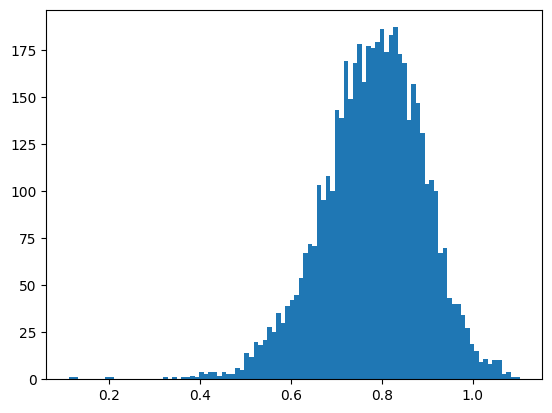

In [6]:

# trực quan phân bố color_distance
import matplotlib.pyplot as plt
plt.hist(color_distance, bins=100)
plt.show()


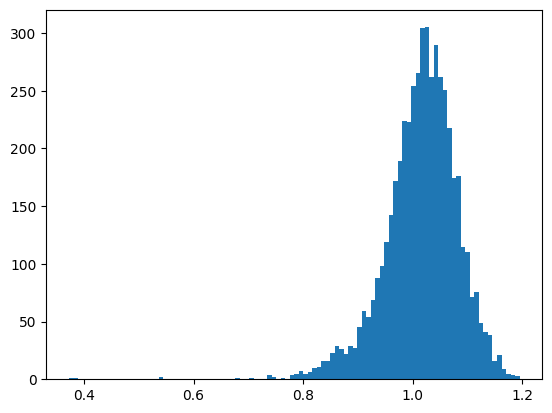

In [7]:
# trực quan phân bố color_distance
import matplotlib.pyplot as plt
plt.hist(hog_distance, bins=100)
plt.show()

In [8]:
import pandas as pd

df = pd.DataFrame({'color_distance': color_distance, 'hog_distance': hog_distance})
df.describe()

,color_distance,hog_distance
count,5050.000000,5050.000000
mean,0.780414,1.016000
std,0.111526,0.066727
min,0.110671,0.371733
25%,0.711288,0.980538
50%,0.786688,1.021731
75%,0.857665,1.059436
max,1.103277,1.195582


In [22]:
from PIL import Image
import numpy as np
from Feature import Feature

def calculateRGBHistogram(image, num_bins):
        value_bin = 256 / num_bins
        histogram_of_red    = np.zeros(num_bins)
        histogram_of_green  = np.zeros(num_bins)
        histogram_of_blue   = np.zeros(num_bins)

        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                histogram_of_red[int(image[i][j][0] / 256 * value_bin)] += 1
                histogram_of_green[int(image[i][j][1] / 256 * value_bin)] += 1
                histogram_of_blue[int(image[i][j][2] / 256 * value_bin)] += 1

        return histogram_of_red, histogram_of_green, histogram_of_blue

image = Image.open('./Flower/hoa cúc huân chương/hoa cúc huân chương01.png')
image = np.array(image)
histogram_of_red, histogram_of_green, histogram_of_blue = calculateRGBHistogram(image[48:64,48:64], 16)
print()
    

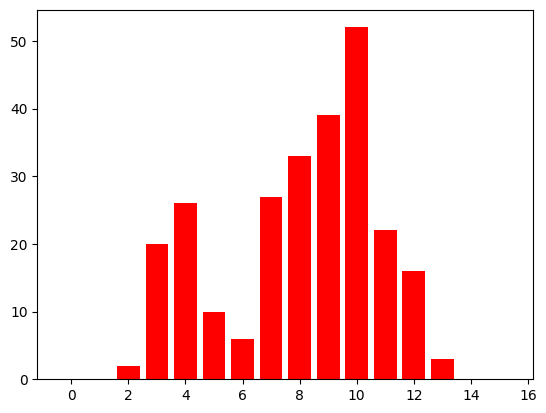

In [23]:

import matplotlib.pyplot as plt
plt.bar(range(16), histogram_of_red, color='red')
plt.show()


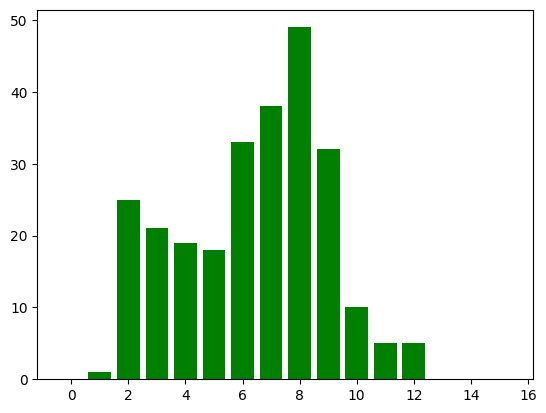

In [24]:
plt.bar(range(16), histogram_of_green, color='green')
plt.show()

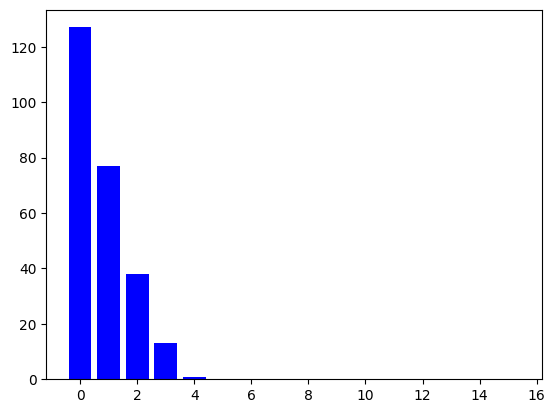

In [25]:
plt.bar(range(16), histogram_of_blue, color='blue')
plt.show()

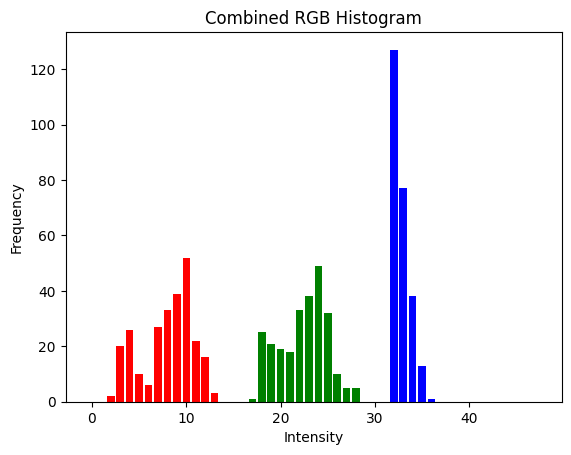

In [29]:
combined_histogram = np.concatenate((histogram_of_red, histogram_of_green, histogram_of_blue))
fig, ax = plt.subplots()
ax.set_title('Combined RGB Histogram')
ax.set_xlabel('Intensity')
ax.set_ylabel('Frequency')
ax.bar(range(len(combined_histogram)), combined_histogram, color=['red']*16 + ['green']*16 + ['blue']*16)
plt.show()

<BarContainer object of 48 artists>

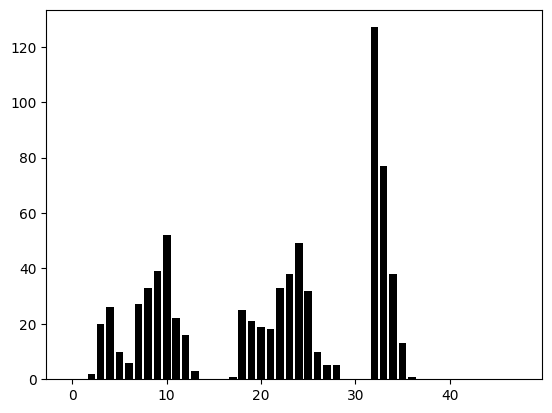

In [30]:
plt.bar(range(48), combined_histogram, color='black')

In [2]:
import json

data = {
    "list": ["item1", "item2", "item3"]
}

json_str = json.dumps(data, separators=(",", ":"), ensure_ascii=False, indent=None)

with open('test.json', 'w') as f:
    json.dump(data, f, separators=(",", ":"))